# Connecting structures together

This example shows how to connect neurons in different structures together and is useful when you do not have the long range axons available. It can also be used within a volume, but note that this will then be in addition to what synapses touch detection provides (so useful when no axon is available).

* Define two volumes, ```VolumeA``` and ```VolumeB``` (far apart).
* Fill the volumes with ```dSPN``` and ```iSPN``` neurons respectively.
* Define the connection rule between the two neuron types.
* Create connections

__Please see connect_structures_example.ipynb (serial version) for more information.__

## Running in parallel

This code can be run in parallel. To do that, please first start ```ipcluster```, on linux you write the following into the terminal, note that you should be in the ```Snudda/examples/notebook``` directory:

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start 
```

These commands are in ```start_ipcluster.sh``` in the ```examples/notebook``` directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook. 

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

In [1]:
import os

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

In [2]:
import os
from snudda.place import create_cube_mesh

network_path = os.path.join("networks", "connect_structures_network")
mesh_file_a = os.path.join(network_path, "mesh", "volume_A.obj")
mesh_file_b = os.path.join(network_path, "mesh", "volume_B.obj")

create_cube_mesh(mesh_file_a, [5e-3,0,0], 300e-6, "Volume A - connect structures example")
create_cube_mesh(mesh_file_b, [-5e-3,0,0], 300e-6, "Volume B - connect structures example")

In [3]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="VolumeA", struct_mesh=mesh_file_a, d_min=15e-6, mesh_bin_width=50e-6)
si.define_structure(struct_name="VolumeB", struct_mesh=mesh_file_b, d_min=15e-6, mesh_bin_width=50e-6)

si.add_neurons(name="dSPN", num_neurons=20, volume_id="VolumeA",
               neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
si.add_neurons(name="iSPN", num_neurons=20, volume_id="VolumeB",
               neuron_dir=os.path.join("$DATA","neurons","striatum","ispn"))

# Normally we would use add_neuron_target to connect the neurons in the same volume together, 
# but this time we want to use connect_neurons instead.

proj_file = os.path.join("data", "ExampleProjection.json")

si.neuron_projection(neuron_name="dSPN", 
                     target_name="iSPN",
                     projection_name="ExampleProjection",
                     projection_file=proj_file,
                     source_volume="VolumeA",
                     dest_volume="VolumeB",
                     projection_radius=100e-6,
                     number_of_targets=[10, 5],
                     number_of_synapses=[10, 5],
                     dendrite_synapse_density="1",
                     connection_type="GABA",
                     dist_pruning=None,
                     f1=0.9,
                     soft_max=None,
                     mu2=None,
                     a3=None)

si.write_json()

Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing networks/connect_structures_network/network-config.json


In [4]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [5]:
# Run detect and prune in parallel by passing rc
from ipyparallel import Client
u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
rc = Client(url_file=u_file, timeout=120, debug=False)

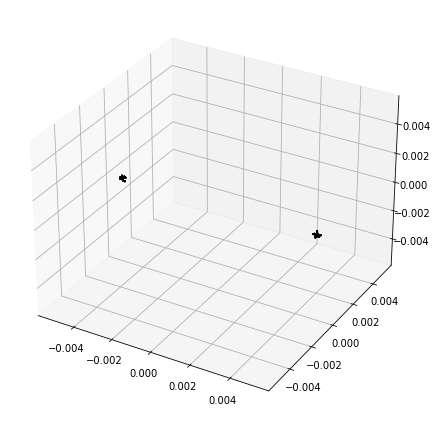

In [6]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

In [7]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

importing SnuddaDetect from snudda.detect.detect on engine(s)
Suppressing printouts for hyper voxels that complete in < 100 seconds.


In [8]:
from snudda import SnuddaProject

sp = SnuddaProject(network_path=network_path)
sp.project()

In [9]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (267/304 synapses, 87.8% kept): 0.1s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s
